## 1 - Coleta dos Dados

Nesta fase inicial do processo CRISP-DM, realizamos a coleta do dataset EEG Eye State, disponível publicamente no repositório UCI Machine Learning Repository. O conjunto de dados contém registros de sinais de EEG (eletroencefalograma) capturados por 14 eletrodos posicionados na cabeça de um indivíduo, conforme o sistema internacional 10-20 de posicionamento. Além dos sinais, há uma coluna indicando o estado dos olhos do participante (abertos ou fechados) em cada instante de tempo.

Para garantir a reprodutibilidade, o download foi realizado diretamente via código, utilizando a biblioteca urllib para acessar o arquivo .arff hospedado na UCI. Em seguida, o arquivo foi carregado com auxílio da função loadarff, da biblioteca scipy, e os dados foram convertidos em um DataFrame do pandas para facilitar a manipulação e análise.

In [2]:
import numpy as np
import pandas as pd
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Baixar o arquivo diretamente do repositório da UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00264/EEG%20Eye%20State.arff"
arquivo_destino = "EEG_Eye_State.arff"
urllib.request.urlretrieve(url, arquivo_destino)

('EEG_Eye_State.arff', <http.client.HTTPMessage at 0x13d10570770>)

In [4]:
# Carregar o arquivo .arff
dados, meta = arff.loadarff(arquivo_destino)
df = pd.DataFrame(dados)

In [5]:
# Conversão da coluna de classe para inteiro (originalmente ela vem como byte)
df['eyeDetection'] = df['eyeDetection'].astype(int)

Abaixo, temos uma amostra dos primeiros registros presentes no dataset, exibindo os valores dos 14 canais de EEG em cinco instantes consecutivos:

In [6]:
# Visualização das primeiras linhas
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


## 2 - Descrição dos Dados

### 2.1 - Análise dos Tipos e Registro dos Dados

O dataset utilizado neste estudo contém um total de 14.980 registros, cada um representando uma leitura simultânea dos sinais de EEG em 14 canais distintos. Esses sinais foram coletados por meio de eletrodos posicionados na cabeça de um único indivíduo, seguindo o sistema internacional 10-20. Cada linha do dataset corresponde a um instante de tempo, com os valores dos sinais capturados em todos os canais naquele momento. A coluna final do dataset, chamada eyeDetection, representa o estado dos olhos do participante: 0 para olhos abertos e 1 para olhos fechados.

Durante a análise inicial, verificamos que não há valores ausentes em nenhuma das colunas, o que garante consistência e integridade na base. Todos os atributos de EEG estão no tipo float64, enquanto a coluna de classe foi convertida para o tipo int64, permitindo a manipulação como uma variável categórica binária.

In [7]:
# Verificação dos tipos de dados e da presença de valores ausentes
print("Informações gerais do dataset:")
df.info()

Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  int32  
dtypes: float64(14), int32(1)
memory usage: 1.7 MB


In [8]:
# Verificação sobre a existência de valores ausentes
print("Verificação de valores ausentes:")
print(df.isnull().sum())

Verificação de valores ausentes:
AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64


In [9]:
# Número de registros e atributos
n_registros = df.shape[0]
n_features = df.shape[1] - 1
nome_coluna_classe = 'eyeDetection'

print(f"Número de registros (imagens): {n_registros}")
print(f"Número de atributos (features): {n_features}")
print(f"Coluna de classe: {nome_coluna_classe}")
print(f"Shape do dataset: {df.shape}")

Número de registros (imagens): 14980
Número de atributos (features): 14
Coluna de classe: eyeDetection
Shape do dataset: (14980, 15)


In [10]:
# Análise da coluna de classe
print(f"ANÁLISE DA COLUNA DE CLASSE:")
print(f"Tipo de dados da classe: {df[nome_coluna_classe].dtype}")
print(f"Número de classes únicas: {df[nome_coluna_classe].nunique()}")
print(f"Classes presentes: {sorted(df[nome_coluna_classe].unique())}")

ANÁLISE DA COLUNA DE CLASSE:
Tipo de dados da classe: int32
Número de classes únicas: 2
Classes presentes: [0, 1]


In [11]:
# Verificação acerca da consistência nos tipos de dados
features_cols = df.columns[:-1]
print(f"TIPOS DE DADOS:")
tipos_features = df[features_cols].dtypes.value_counts()
print(f"Tipos nas features: {tipos_features.to_dict()}")
print(f"Tipo da classe: {df[nome_coluna_classe].dtype}")

TIPOS DE DADOS:
Tipos nas features: {dtype('float64'): 14}
Tipo da classe: int32


### 2.2 - Análise da Distribuição de Classes e Features

Nesta etapa, realizamos uma análise detalhada da variável alvo e das features que compõem o dataset. A variável de classe eyeDetection apresenta uma distribuição levemente desequilibrada: cerca de 55% dos registros indicam olhos abertos (classe 0), enquanto os demais 45% correspondem a olhos fechados (classe 1). Essa diferença é evidenciada tanto no gráfico de barras quanto no gráfico de pizza, e reforçada pela Curva de Lorenz, que mostra um leve afastamento da linha de igualdade perfeita — confirmando um pequeno desbalanceamento de classes, embora não crítico.

Em relação às features, cada registro é composto por 14 variáveis contínuas, representando sinais de EEG captados simultaneamente por diferentes eletrodos. A análise dos histogramas mostra que os sinais seguem distribuições semelhantes entre os canais, com leve concentração em certas faixas de valores, o que pode refletir padrões fisiológicos ou ruídos consistentes ao longo do tempo. Os boxplots reforçam a presença de distribuições similares, embora com variações sutis na dispersão e presença de outliers em alguns canais.

Por fim, a visualização da evolução temporal dos sinais nos 500 primeiros registros revela padrões oscilatórios característicos dos sinais de EEG, com flutuações relativamente suaves e sincronizadas entre os canais. Esse tipo de comportamento indica a estabilidade do processo de aquisição e sugere que o sinal pode ser explorado em termos de variação ao longo do tempo para aplicações como detecção de estado ocular ou análise de atividade cerebral.

#### 2.2.1 - Distribuição das Classes

C:\Users\ruben\AppData\Local\Temp\ipykernel_42184\3573681714.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=nome_coluna_classe, data=df, palette='Set2')


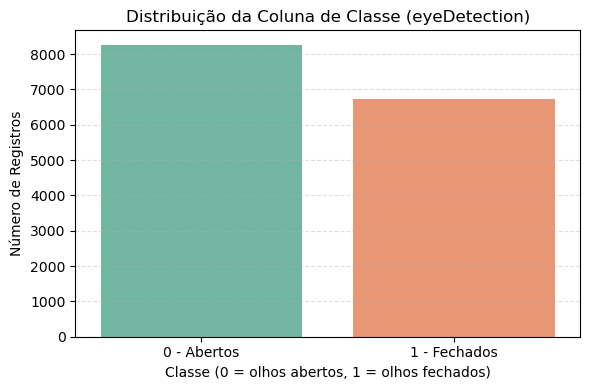

In [12]:
# Verifica se há apenas 0 e 1
classe_counts = df[nome_coluna_classe].value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(6, 4))
sns.countplot(x=nome_coluna_classe, data=df, palette='Set2')
plt.title("Distribuição da Coluna de Classe (eyeDetection)")
plt.xlabel("Classe (0 = olhos abertos, 1 = olhos fechados)")
plt.ylabel("Número de Registros")
plt.xticks([0, 1], ['0 - Abertos', '1 - Fechados'])
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

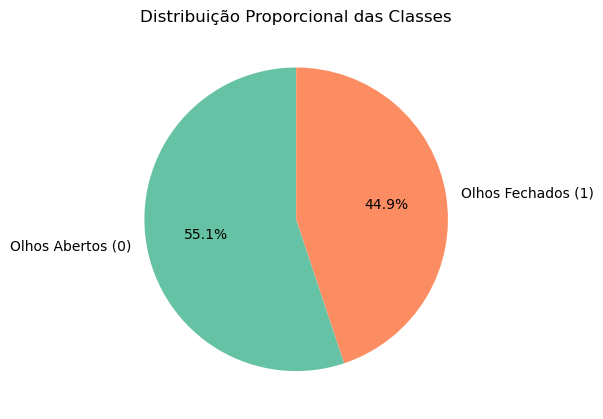

In [13]:
# Gráfico de pizza
plt.figure(figsize=(6, 6))
classe_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=['Olhos Abertos (0)', 'Olhos Fechados (1)'], colors=sns.color_palette("Set2"))
plt.title("Distribuição Proporcional das Classes")
plt.ylabel("")
plt.tight_layout()
plt.show()

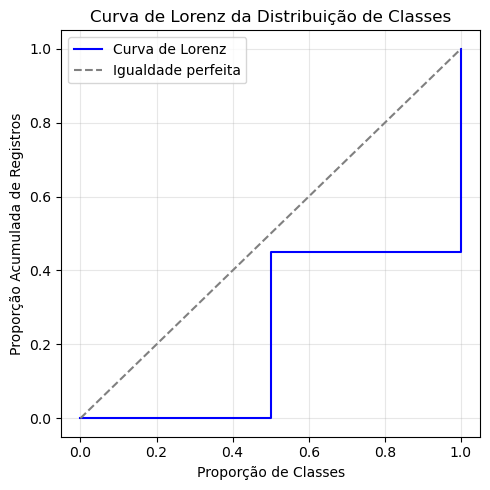

In [14]:
# Curva de Lorenz
freq_cresc = classe_counts.sort_values()
props = freq_cresc / freq_cresc.sum()
cum_props = props.cumsum()
x = [0, 0.5, 1]
y = [0, cum_props.iloc[0], 1]

plt.figure(figsize=(5, 5))
plt.plot(x, y, drawstyle='steps-post', label='Curva de Lorenz', color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Igualdade perfeita')
plt.title('Curva de Lorenz da Distribuição de Classes')
plt.xlabel('Proporção de Classes')
plt.ylabel('Proporção Acumulada de Registros')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#### 2.2.2 - Distribuição das Features

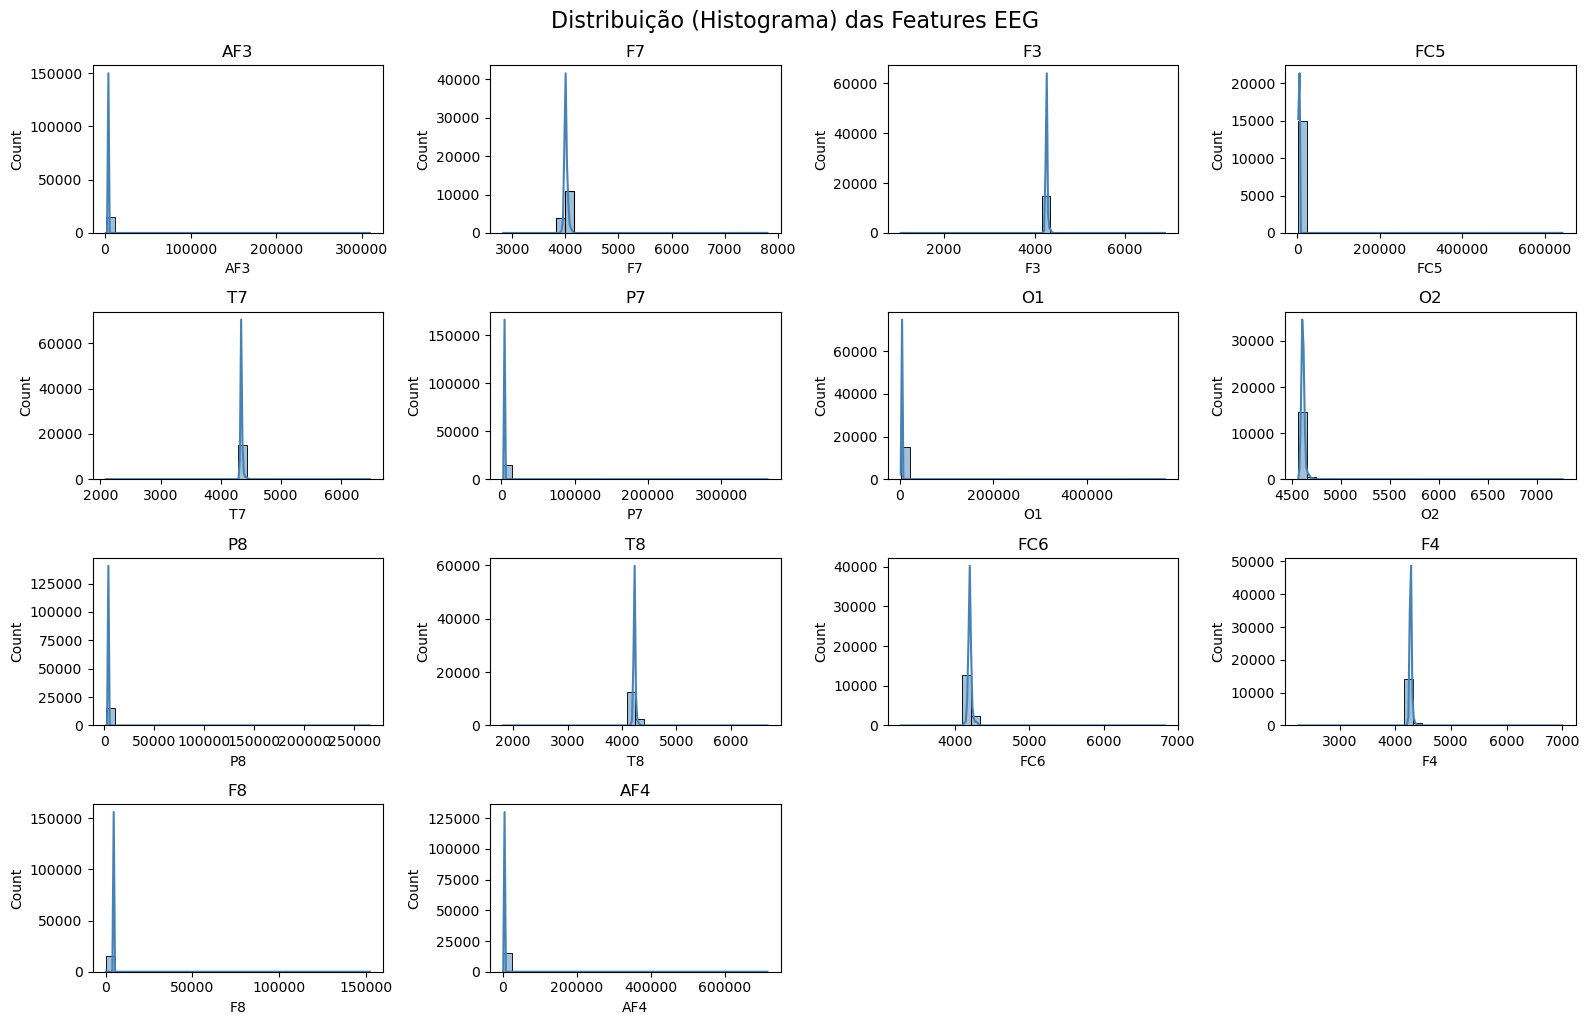

In [15]:
# Lista de colunas de features
features_cols = df.columns[:-1]

# Histograma das features (densidade)
plt.figure(figsize=(16, 10))
for i, col in enumerate(features_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], bins=30, kde=True, color='steelblue')
    plt.title(col)
    plt.tight_layout()
plt.suptitle('Distribuição (Histograma) das Features EEG', fontsize=16, y=1.02)
plt.show()

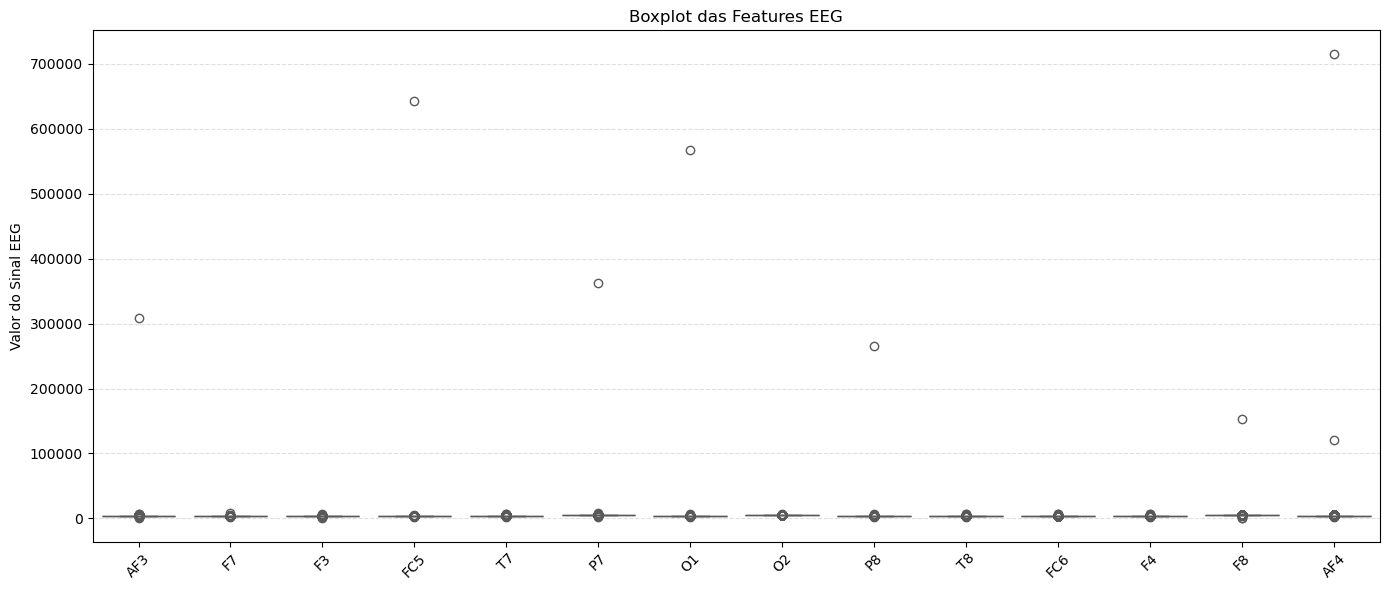

In [16]:
# Boxplots das features
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[features_cols], palette='Set2')
plt.xticks(rotation=45)
plt.title("Boxplot das Features EEG")
plt.ylabel("Valor do Sinal EEG")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

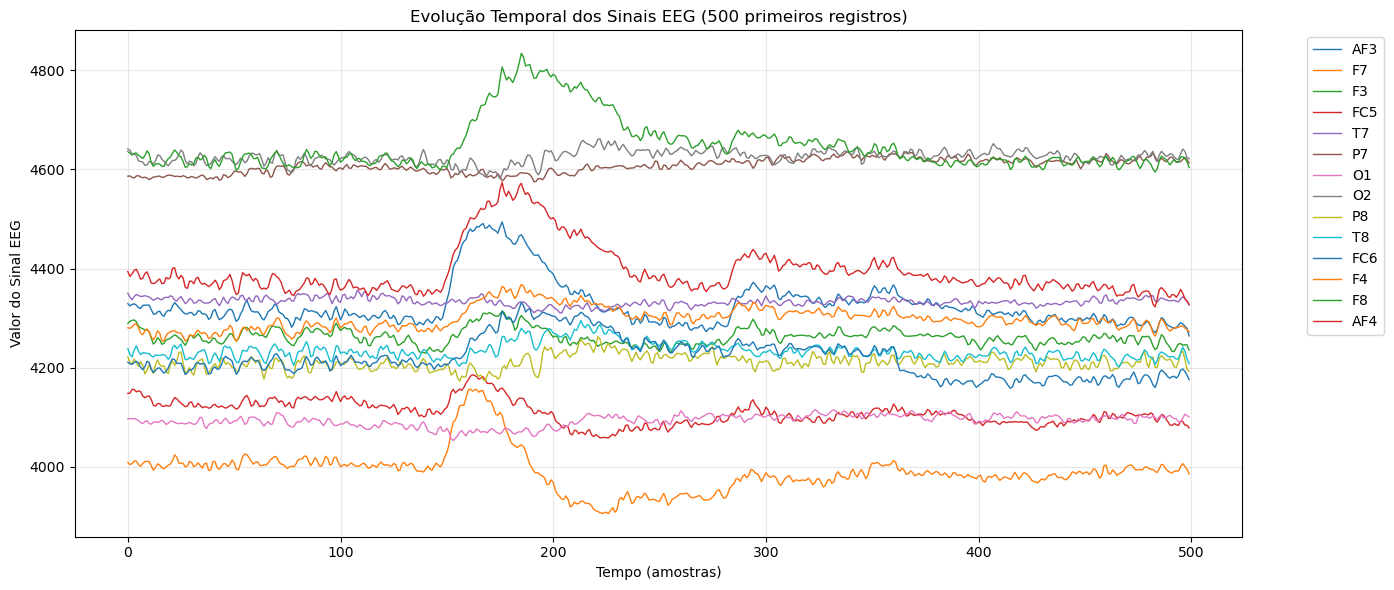

In [17]:
# Evolução temporal dos sinais (primeiros 500 registros)
plt.figure(figsize=(14, 6))
for col in features_cols:
    plt.plot(df[col].iloc[:500], label=col, linewidth=1)
plt.title("Evolução Temporal dos Sinais EEG (500 primeiros registros)")
plt.xlabel("Tempo (amostras)")
plt.ylabel("Valor do Sinal EEG")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()

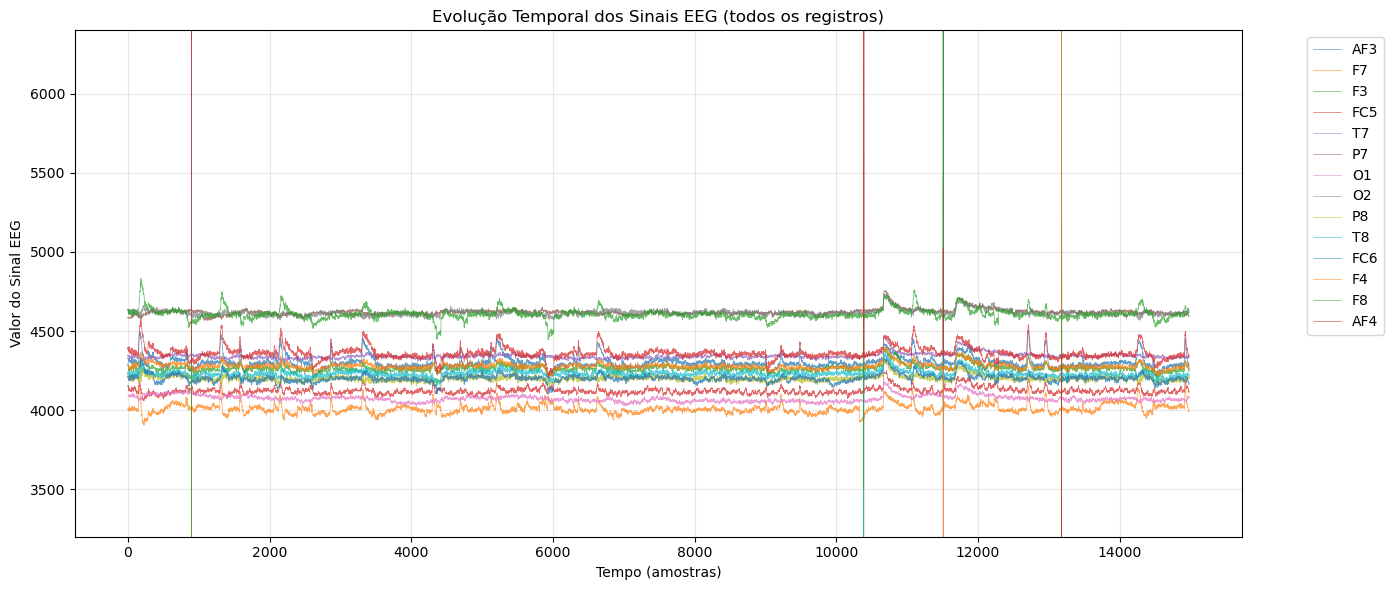

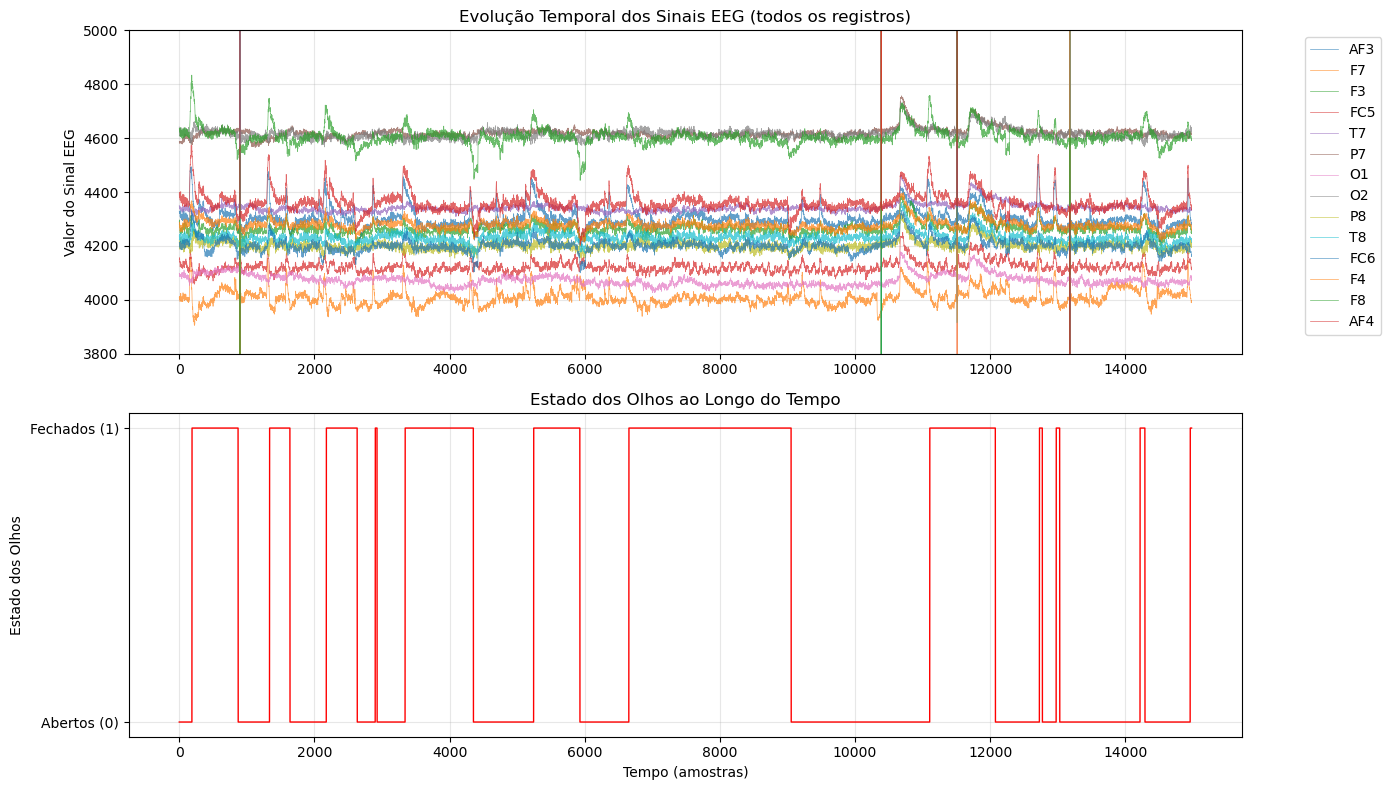

In [19]:
# Evolução temporal dos sinais (todos os registros)
plt.figure(figsize=(14, 6))
for col in features_cols:
    plt.plot(df[col], label=col, linewidth=0.5, alpha=0.7)
plt.title("Evolução Temporal dos Sinais EEG (todos os registros)")
plt.xlabel("Tempo (amostras)")
plt.ylabel("Valor do Sinal EEG")
plt.ylim(3200, 6400)  # Fixando o range do eixo Y
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()

# Evolução temporal dos sinais com indicação da classe alvo
plt.figure(figsize=(14, 8))

# Subplot superior: sinais EEG
plt.subplot(2, 1, 1)
for col in features_cols:
    plt.plot(df[col], label=col, linewidth=0.5, alpha=0.7)
plt.title("Evolução Temporal dos Sinais EEG (todos os registros)")
plt.ylabel("Valor do Sinal EEG")
plt.ylim(3800, 5000)  # Fixando o range do eixo Y
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)

# Subplot inferior: classe alvo
plt.subplot(2, 1, 2)
plt.plot(df['eyeDetection'], color='red', linewidth=1)
plt.title("Estado dos Olhos ao Longo do Tempo")
plt.xlabel("Tempo (amostras)")
plt.ylabel("Estado dos Olhos")
plt.yticks([0, 1], ['Abertos (0)', 'Fechados (1)'])
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

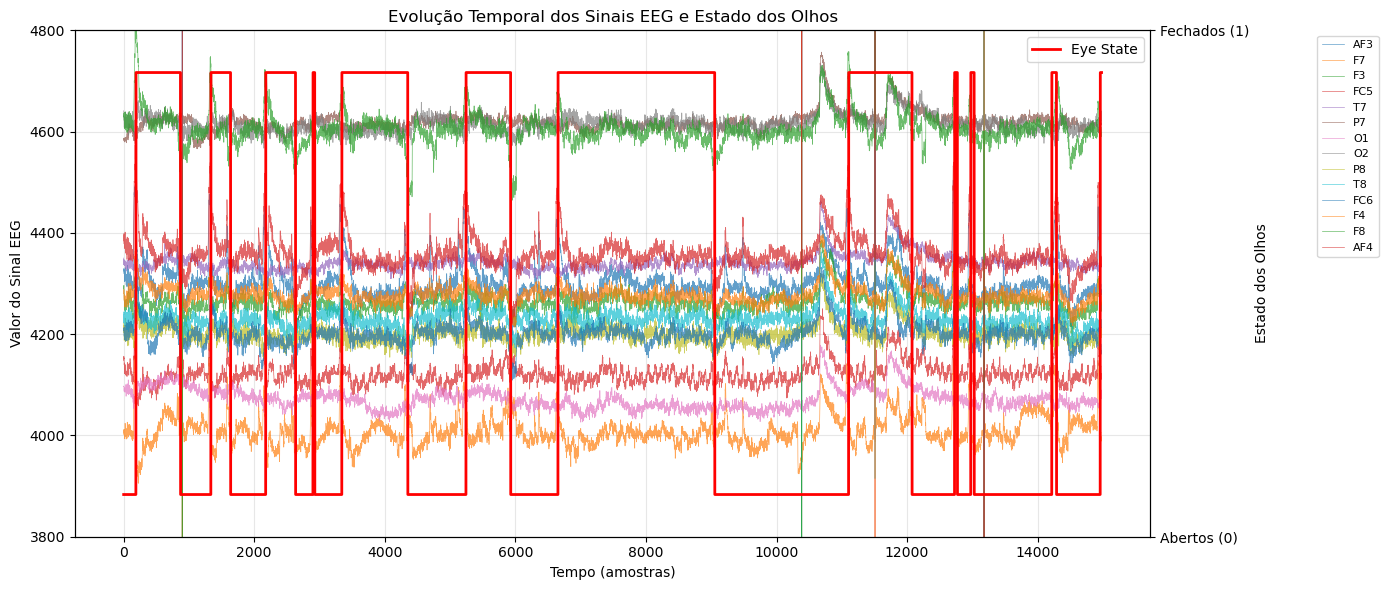

In [22]:
# Evolução temporal dos sinais EEG com classe alvo no mesmo gráfico (eixos duplos)
fig, ax1 = plt.subplots(figsize=(14, 6))

# Eixo esquerdo: sinais EEG
for col in features_cols:
    ax1.plot(df[col], label=col, linewidth=0.5, alpha=0.7)

ax1.set_xlabel("Tempo (amostras)")
ax1.set_ylabel("Valor do Sinal EEG")
ax1.set_ylim(3800, 4800)  # Fixando o range do eixo Y esquerdo
ax1.tick_params(axis='y')
ax1.grid(alpha=0.3)
ax1.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fontsize=8)

# Eixo direito: classe alvo
ax2 = ax1.twinx()
ax2.plot(df['eyeDetection'], color='red', linewidth=2, label='Eye State')
ax2.set_ylabel("Estado dos Olhos")
ax2.set_ylim(-0.1, 1.1)
ax2.set_yticks([-0.1, 1.1])
ax2.set_yticklabels(['Abertos (0)', 'Fechados (1)'])
ax2.tick_params(axis='y')

# Adicionar legenda para o eixo direito
ax2.legend(loc='upper right')

plt.title("Evolução Temporal dos Sinais EEG e Estado dos Olhos")
plt.tight_layout()
plt.show()

# 3 - Exploração dos Dados

## 3.1 - Matriz de Correlação

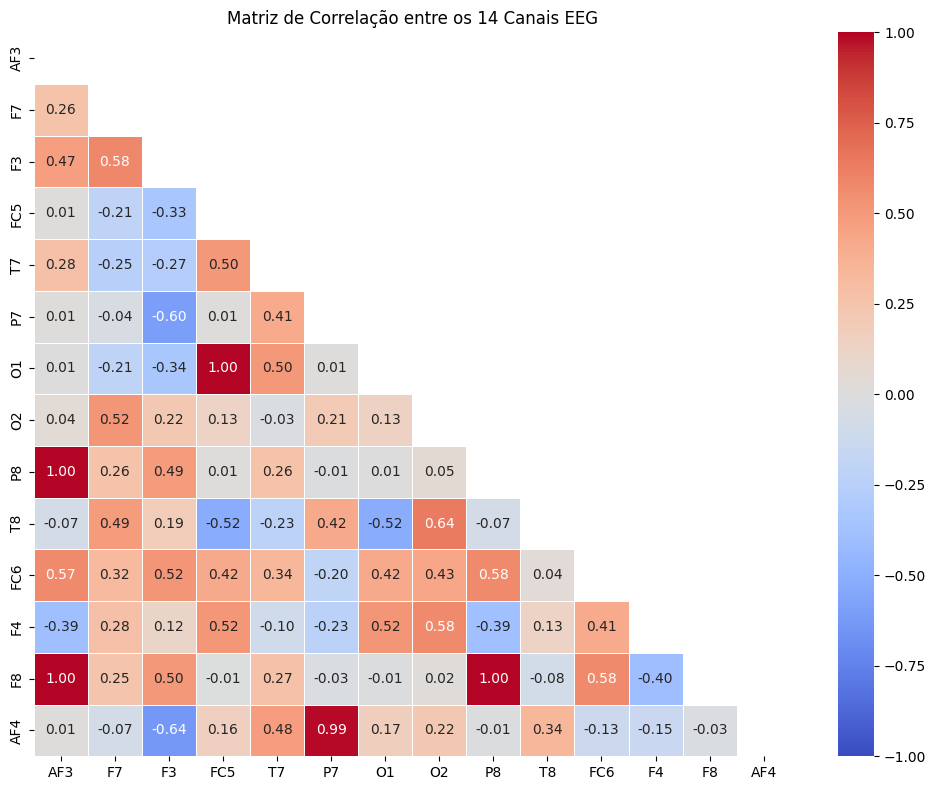

In [ ]:
# removemos a coluna‐alvo para evitar enviesar a matriz
corr = df.drop(columns=["eyeDetection"]).astype(float).corr()

plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    vmin=-1, vmax=1,
    annot=True, fmt=".2f",
    linewidths=.5,
)
plt.title("Matriz de Correlação entre os 14 Canais EEG")
plt.tight_layout()
plt.show()

A matriz de correlação mostra uma forte multicolinearidade entre vários canais. Destacam-se correlações praticamente perfeitas (>|0,99|) entre FC5–O1, AF3–P8, F8–P8 e AF3–F8, sugerindo que alguns sinais carregam informação quase redundante. Há ainda correlações altas, acima de 0,6, entre pares como O2–T8 e AF4–F3. Essa redundância deve ser levada em conta para evitar instabilidade em modelos que assumem independência entre variáveis; uma estratégia simples é eliminar um canal de cada par muito correlacionado ou, de forma mais robusta, usar técnicas de redução de dimensionalidade — por exemplo, o PCA que será aplicado na etapa 3.3.


## 3.2 - Remoção de Outliers

In [ ]:
# zscore de cada amostra em cada um dos 14 canais EEG
z = df.drop(columns=["eyeDetection"]).apply(zscore)

# definição do outlier como |z| > 3 (aprox. 0,3 % sob curva normal)
outlier_mask = (z.abs() > 3)

# contagem de outliers por canal
outliers_per_channel = outlier_mask.sum()

# percentual de amostras que têm ao menos um outlier em qualquer canal
rows_with_outlier = outlier_mask.any(axis=1).mean() * 100

display(outliers_per_channel.to_frame("n_outliers"))
print(f"{rows_with_outlier:.2f}% das amostras apresentam pelo menos um valor extremo.")

,n_outliers
AF3,1
F7,17
F3,4
FC5,1
T7,37
P7,1
O1,1
O2,66
P8,1
T8,25


0.59% das amostras apresentam pelo menos um valor extremo.


A análise dos outliers utilizando o escore Z com um limiar de 3 desvios padrão revelou que 0.59% das amostras apresentam pelo menos um valor extremo. Embora a maioria dos canais tenha poucos outliers, alguns, como O2 (66 outliers), FC6 (46 outliers), T7 (37 outliers) e T8 (25 outliers), apresentaram uma quantidade maior em comparação com os demais. A presença de outliers em menos de 1% dos dados sugere que a sua remoção ou tratamento pode ter um impacto limitado na análise geral, mas pode ser considerada dependendo da sensibilidade do modelo a valores extremos.

## 3.3 - Redução da dimensionalidade com PCA


In [ ]:
# 1) Centralização dos preditores (média zero, sem dividir pelo desvio-padrão)
target_col = "eyeDetection"             # coluna-alvo
X = df.drop(columns=[target_col]).values
y = df[target_col].values

X_cent = X - X.mean(axis=0)             # centraliza cada canal


In [ ]:
# 2) PCA para reter 95 % da variância

pca = PCA(n_components=0.95, svd_solver="full", random_state=42)
X_pca = pca.fit_transform(X_cent)

print(f"Número de componentes para 95 % da variância: {pca.n_components_}")


Número de componentes para 95 % da variância: 3


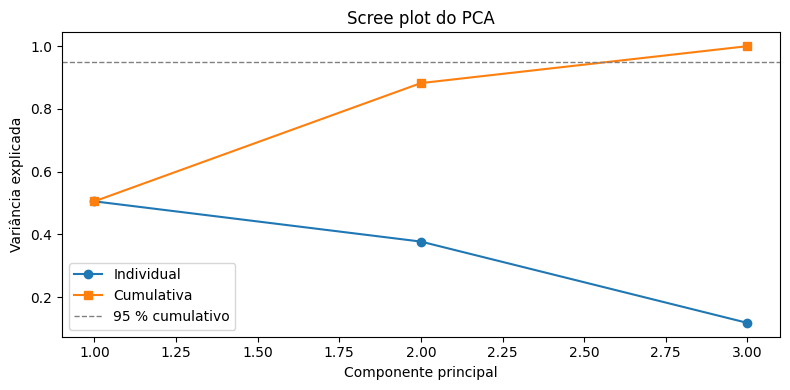

In [ ]:
# 3) Scree plot — variância individual × cumulativa

evr = pca.explained_variance_ratio_
cum_evr = np.cumsum(evr)

plt.figure(figsize=(8,4))
plt.plot(range(1, len(evr)+1), evr, marker="o", label="Individual")
plt.plot(range(1, len(evr)+1), cum_evr, marker="s", label="Cumulativa")
plt.axhline(0.95, color="gray", ls="--", lw=1, label="95 % cumulativo")
plt.xlabel("Componente principal")
plt.ylabel("Variância explicada")
plt.title("Scree plot do PCA")
plt.legend()
plt.tight_layout()
plt.show()


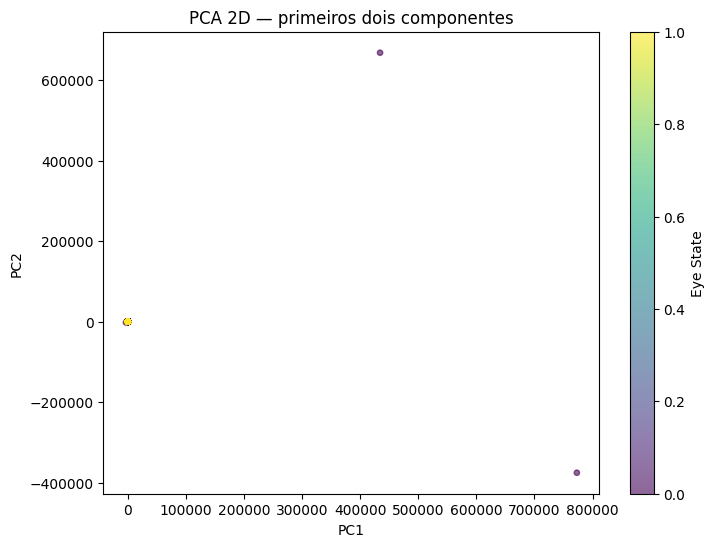

In [ ]:
# 4) PCA de 2 componentes para visualização
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_cent)

plt.figure(figsize=(8,6))
plt.scatter(
    X_pca_2d[:, 0], X_pca_2d[:, 1],
    c=y,                              # rótulos 0 (olho aberto) / 1 (olho fechado)
    cmap="viridis",
    s=15, alpha=0.6
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D — primeiros dois componentes")
plt.colorbar(label="Eye State")
plt.show()


A redução de dimensionalidade utilizando PCA foi aplicada para reter 95% da variância dos dados centralizados. Foram necessários 3 componentes principais para explicar essa proporção da variância. Isso indica que, apesar de termos 14 features originais, a maior parte da informação relevante para a variabilidade dos dados pode ser capturada por um número significativamente menor de componentes.

O Scree Plot visualiza a variância explicada por cada componente principal (individual) e a variância cumulativa explicada à medida que mais componentes são incluídos. Podemos observar que o primeiro componente principal explica a maior parte da variância, seguido pelo segundo e terceiro componentes. A linha tracejada em 0.95 (95%) confirma que com 3 componentes principais atingimos o objetivo de reter 95% da variância total.

A visualização em 2D utilizando os dois primeiros componentes principais (PC1 e PC2) mostra a distribuição dos dados no espaço reduzido. A colorização dos pontos pela classe (0 para olhos abertos e 1 para olhos fechados) permite observar se há alguma separação visual entre as classes nesses dois componentes. Neste gráfico, a separação entre as classes não é clara, o que sugere que apenas os dois primeiros componentes principais podem não ser suficientes para uma distinção linear perfeita entre olhos abertos e fechados. No entanto, o PCA ainda é útil para reduzir a dimensionalidade e potencialmente melhorar o desempenho de modelos de machine learning ao lidar com a multicolinearidade e ruído nos dados originais.

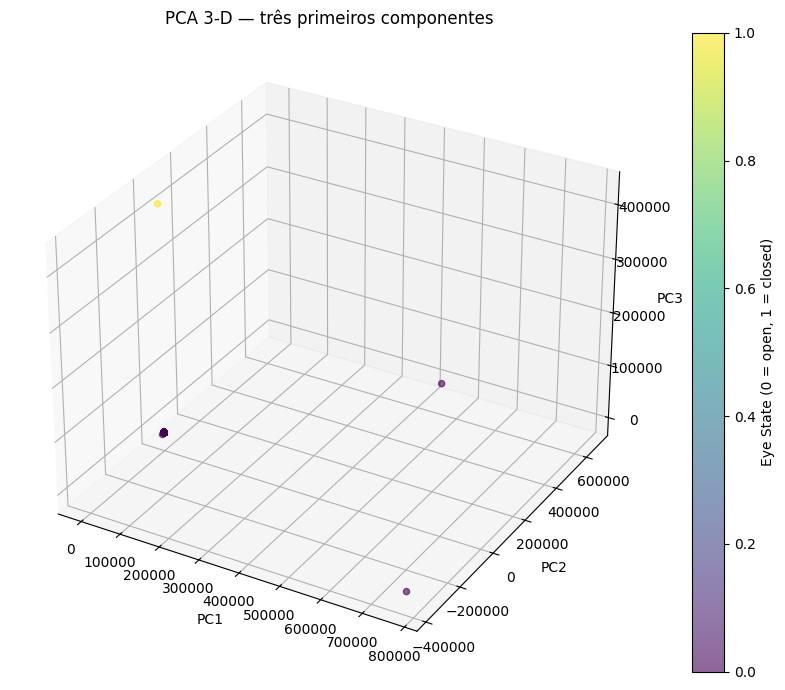

In [ ]:
# 3-D PCA — três primeiros componentes
from mpl_toolkits.mplot3d import Axes3D


pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(X_cent)            # X_cent foi criado na etapa de centralização

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=y,                                           # 0 = olho aberto, 1 = olho fechado
    cmap="viridis",
    s=20, alpha=0.6
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA 3-D — três primeiros componentes")

fig.colorbar(scatter, label="Eye State (0 = open, 1 = closed)")
plt.tight_layout()
plt.show()


A visualização em 3D utilizando os três primeiros componentes principais (PC1, PC2 e PC3) permite explorar a separação das classes (olhos abertos e olhos fechados) em um espaço tridimensional. Ao inspecionar o gráfico, podemos verificar se a inclusão do terceiro componente principal ajuda a melhorar a separação entre as classes em comparação com a visualização 2D. Uma separação mais clara neste espaço 3D indicaria que a informação contida no terceiro componente é relevante para distinguir os estados dos olhos.

## 3.4 - Checagem de Duplicação

In [ ]:
target_col = "eyeDetection"

# 1) duplicatas considerando todas as colunas (features + alvo)
dup_all = df.duplicated(keep="first")        # primeiras ocorrências ficam, demais marcam True
n_dup_all = dup_all.sum()

# 2) duplicatas considerando apenas as features (preditores)
dup_features = df.drop(columns=[target_col]).duplicated(keep="first")
n_dup_feat = dup_features.sum()

print(f"Duplicatas completas (features + alvo): {n_dup_all}")
print(f"Duplicatas apenas nos preditores:       {n_dup_feat}")

# 3) percentual de duplicatas na base
pct_dup = n_dup_all / len(df) * 100
print(f"{pct_dup:.2f}% das linhas são cópias exatas de outra observação.")


Duplicatas completas (features + alvo): 0
Duplicatas apenas nos preditores:       0
0.00% das linhas são cópias exatas de outra observação.


A checagem de duplicação foi realizada considerando tanto as linhas completas (features + alvo) quanto apenas as features (preditores). Os resultados mostram que não há linhas duplicadas no dataset. Isso significa que cada registro é único, o que é um bom indicador da qualidade dos dados para análise e modelagem. Não há necessidade de remover duplicatas nesta etapa.

## 3.5 - Boxplot

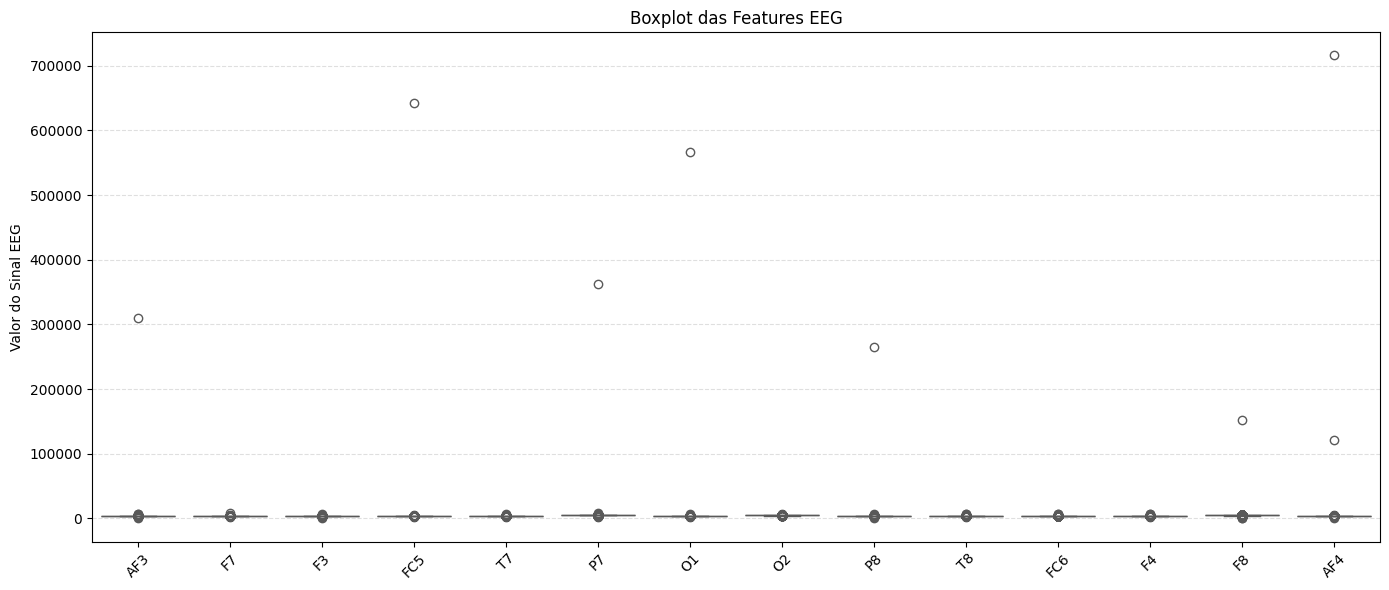

In [ ]:
# Boxplots das features
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[features_cols], palette='Set2')
plt.xticks(rotation=45)
plt.title("Boxplot das Features EEG")
plt.ylabel("Valor do Sinal EEG")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

O boxplot das features EEG mostra a distribuição dos valores para cada canal. É possível observar a mediana, os quartis e a presença de outliers em cada feature. A maioria dos canais apresenta uma distribuição relativamente concentrada, com alguns outliers visíveis acima ou abaixo dos limites dos "bigodes". Alguns canais, como o O2 e o FC6, parecem ter uma dispersão maior e um número mais significativo de outliers em comparação com outros. Essa visualização reforça a necessidade de considerar o tratamento de outliers, como discutido na seção 3.2, dependendo da sensibilidade do modelo a ser utilizado.

## 3.6 - Redução da Dimensionalidade via t-SNE

Devido à intensidade computacional do t-SNE, vamos usar uma amostra dos dados para visualização


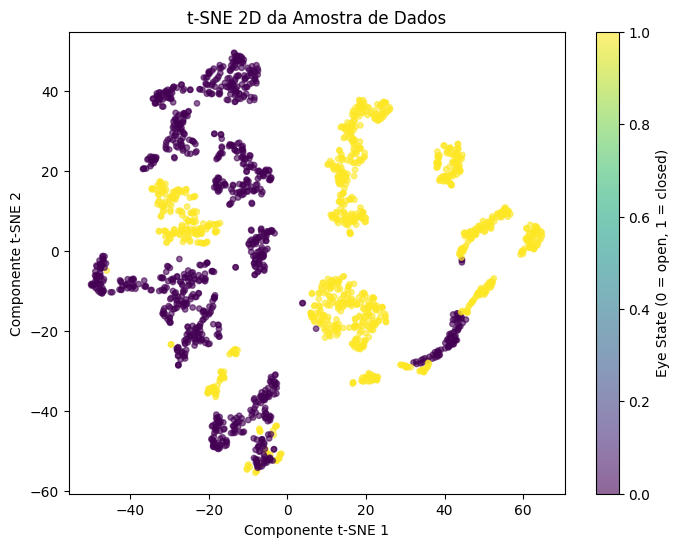

In [ ]:
from sklearn.manifold import TSNE

# Ajuste do tamanho da amostra se necessário
n_samples = 2000
X_subset = X_cent[:n_samples]  # Usando X_cent da seção PCA
y_subset = y[:n_samples]

# Aplicando t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_subset)

# Visualização
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='viridis', s=15, alpha=0.6)
plt.title('t-SNE 2D da Amostra de Dados')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.colorbar(label='Eye State (0 = open, 1 = closed)')
plt.show()

A visualização em 2D obtida através do t-SNE aplicado a uma amostra dos dados centralizados revela agrupamentos distintos no espaço reduzido. Diferente do PCA 2D, o t-SNE tende a preservar melhor as relações de vizinhança local, e neste gráfico, é possível observar uma tendência à formação de clusters para as duas classes (olhos abertos e olhos fechados). Embora não haja uma separação linear perfeita, os pontos de cada classe parecem se agrupar em regiões separadas, indicando que o t-SNE capturou alguma estrutura nos dados que permite a distinção entre os estados dos olhos. A presença de alguma sobreposição entre os clusters sugere que pode haver complexidade na fronteira de decisão entre as classes ou que os dois primeiros componentes do t-SNE não são suficientes para uma separação completa.

# 4 - Qualidade dos Dados

Com base nas análises exploratórias e de qualidade dos dados realizadas, podemos resumir os seguintes pontos:

- **Dados Completos e Consistentes**: O dataset não apresenta valores ausentes, e os tipos de dados estão consistentes com a natureza das medições de EEG e a variável alvo.
- **Ausência de Duplicatas**: Não foram encontradas linhas duplicadas, garantindo que cada registro é único.
- **Distribuição de Classes**: A distribuição das classes (olhos abertos vs. olhos fechados) mostra um leve desbalanceamento, com a classe "olhos abertos" sendo ligeiramente mais frequente. Isso deve ser considerado nas etapas de modelagem, possivelmente com o uso de técnicas de tratamento de desbalanceamento se necessário.
- **Outliers**: A análise de outliers revelou a presença de valores extremos, especialmente em alguns canais como O2 e FC6. Embora a porcentagem total de amostras com outliers seja baixa (<1%), a decisão sobre remover ou tratar esses outliers dependerá da robustez do modelo a ser utilizado.
- **Multicolinearidade e Redundância**: A matriz de correlação indicou alta multicolinearidade entre vários canais de EEG, sugerindo redundância de informação. Técnicas de redução de dimensionalidade, como PCA, foram eficazes em reduzir o número de features necessárias para reter uma alta porcentagem da variância dos dados, o que pode ajudar a mitigar problemas relacionados à multicolinearidade.
- **Estrutura dos Dados em Baixa Dimensionalidade**: As visualizações obtidas por PCA e t-SNE em 2D e 3D forneceram insights sobre a estrutura dos dados e a separação das classes em espaços de menor dimensão. Enquanto o PCA 2D não mostrou uma separação clara, o t-SNE 2D revelou uma tendência de agrupamento por classe, sugerindo que há estrutura nos dados que pode ser explorada por modelos não lineares.

Em suma, a qualidade geral dos dados parece boa, com a necessidade de considerar o desbalanceamento de classes e o tratamento de outliers e multicolinearidade para as próximas etapas de pré-processamento e modelagem.